## This is exp 5x26 for ibmq_belem. The initial circuit is 5x6 which is then traspiled to 5x26. Only H and CNOT, CCNOT and X gates are used.

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

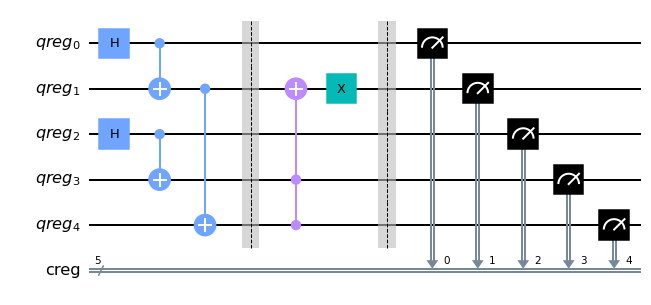

In [2]:
#define the number of qubits - width
width = 5

#define the quantum register
q =  QuantumRegister(width,"qreg")

# define a classical register
# it stores the measurement result of the quantum part
c = ClassicalRegister(width,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(2)

qc.cx(0,1)
qc.cx(1,4)
qc.cx(2,3)
qc.barrier()
qc.ccx(3,4,1)
qc.x(1)
qc.barrier()

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

In [3]:
qc.depth()

6

{'10001': 2515, '11111': 2491, '00010': 2532, '01110': 2462}



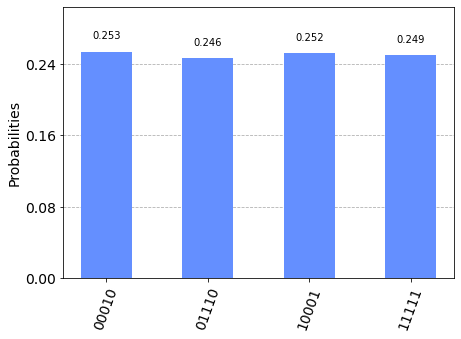

In [4]:
# execute the circuit 10000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [5]:
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

provider = IBMQ.get_provider("ibm-q")
#using this tool to monitor our position in queue
from qiskit.tools.monitor import job_monitor

#choose real device
backend = provider.get_backend('ibmq_belem')

In [6]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

### Run the circuit with optimization_level = 1

In [7]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 25


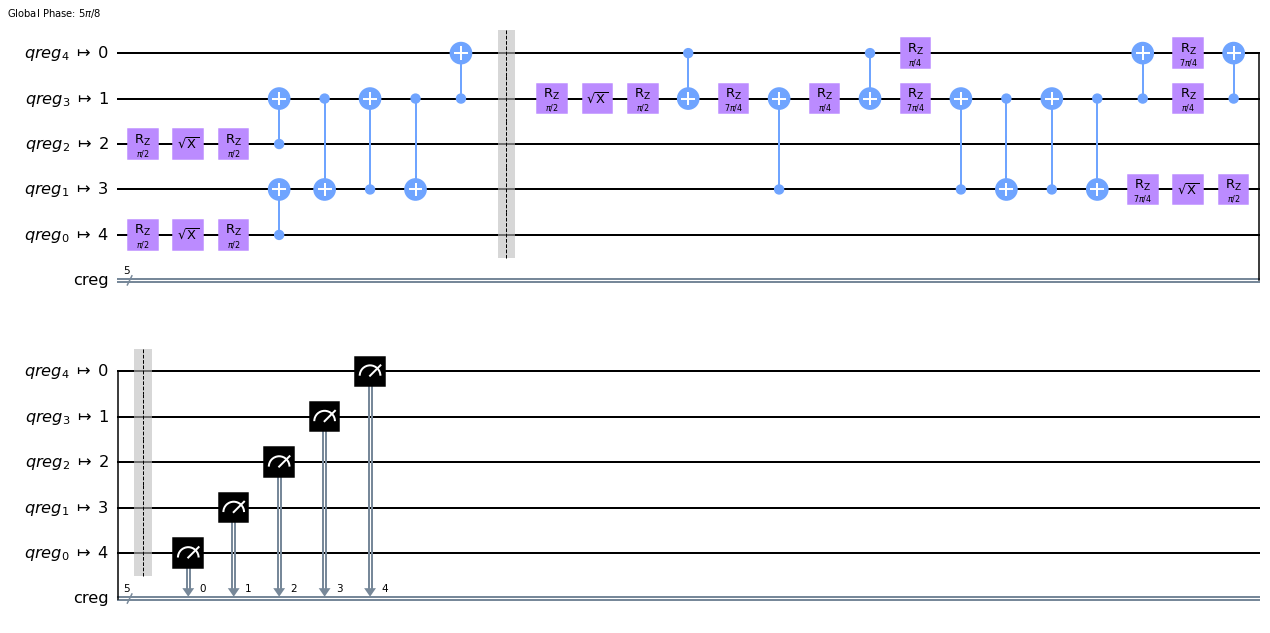

In [8]:
qc_transpiled.draw(output='mpl')

In [9]:
shots = 1024
job = execute(qc, backend= backend, name="Exp_5x7_ibmq_belem_opt_level=1" , shots= shots)
job_monitor(job)

C:\Users\ilias\anaconda3\envs\quantumQiskit\lib\site-packages\qiskit\execute.py:298: UserWarning: name is not a recognized runtime option and may be ignored by the backend.
  job = backend.run(experiments,


Job Status: job has successfully run


as expected the hight depth of the circuit highly affects the outcome and no usefull conclusion can be made on which is the right outcome

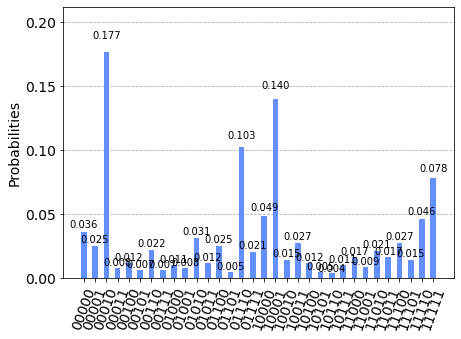

In [10]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)